In [1]:
#Random Generators (available in numpy package)

import numpy as np

np.random.rand() #genrates a random number between 0 and 1

0.23300911914959754

In [5]:
np.random.rand() #a different random number

0.2268514535642031

In [3]:
#How is the aboe random number created?
#computers usually create so called pseudo-random numbers - generated from a mathematical formula starting with a random seed
#we can set the seed manually

np.random.seed(123) #setting seed to 123
print(np.random.rand()) #calling rand functions twice to work on now defined seed at 123
print(np.random.rand())

0.6964691855978616
0.28613933495037946


In [4]:
#Let's reset the seed to 123 and try random numbers again

np.random.seed(123)
print(np.random.rand())
print(np.random.rand())  

0.6964691855978616
0.28613933495037946


In [ ]:
#so we generated teh same outputs starting with same seed!! Even if it is random! This is why it is pseudo random
# Selecting seed ensures reproducibilty in generating random numbers where it is required.
#For example in the case of hacker -statistics problems, where we need to run different version of same algorithm on random numbers dataset.



In [8]:
#-- EXAMPLE : Simulating a coin toss using other capabilities of np.random... function

np.random.seed(123) #defining a seed
coin = np.random.randint(0,2) #generates random integer between 0 and 2 (includes 0 but not two- so possible outcomes 0 and 1)
print(coin)
if coin==0:
    print("HEADS")
else:
    print("TAILS")  #since the seed is defined it will always result in 0 for the first random number

0
HEADS


In [11]:
## Empire State building hacker Statistics

#In the Empire State Building bet, your next move depends on the number of eyes you throw with the dice. 
#Roll the dice, if dice is 1 or 2, you go one step down.
# if dice is 3, 4 or 5, you go one step up.
# Else, you throw the dice again. The number of eyes is the number of steps you go up.
# You start at step 0  and there is a probability of flling the step (starting over again) of 0.1% eah time you take a step

#Step 1 : Assuming we are at 50th step, lets use randomint() fucntion to see the if-else cases

# Starting step
step = 50
dice = np.random.randint(1,7) # Roll the dice
if dice <= 2 : # Finish the control construct
    step = step - 1
elif dice >= 3 and dice <=5 :
    step = step + 1
else :
    step = step + np.random.randint(1,7)

print("The dice eye was " + str(dice) + " so we reach step " + str(step))  

The dice eye was 3 so we reach step 51


In [19]:
#Since we used dice to determine the next step, its a random step
#If we use the dice to determine next 100 steps, its called random walk (common in science, exmple Gambler's financial status, path of molecules etc)

# Example of Random steps vs Random Walk

# Randoms Steps example : Simulating 10 coin flis and storing data in a list (each step being random, not dependent on previous step)

np.random.seed(110)
outcomes = [] # creating an emtpy list

for i in range(10) : #running iterations 10 times
    coin1 = np.random.randint(0,2) 
    if coin1==0:
        outcomes.append("Heads")
    else:
        outcomes.append("Tails")
print("random steps example outcome : " + str(outcomes))
    

random steps example outcome : ['Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads']


In [28]:
#An example of converting above randoms steps example to random walk would be to track the total number of tails while simulating a game

np.random.seed(110)
tails = [0] #start with a list containing 0 as he the only element
for i in range(10) : #running iterations 10 times
        coin1 = np.random.randint(0,2) 
        tails.append(tails[i]+ coin1) #stores value for each iteration. However increase the number of tails only if 1 comes
        
print("All outcomes : " + str(tails)) #shows how with each iteration, the tails number went up
print("The total number of tails in given range is :" + str(tails[-1])) #the final element in tails list gives the number of tails that turned up
 
    
    ## -- This is how a bunch of random steps are converted into a random walk

All outcomes : [0, 0, 1, 2, 3, 4, 5, 6, 6, 6, 6]
The total number of tails in given range is :6


In [31]:
#Step 2 for Empire State case  : Simulating random walk for 100 steps 

np.random.seed(110)
random_walk = [0] # Initialize random_walk -- we are at bottom of empire state building
for x in range(100) : #100 random steps
    step = random_walk[-1] #step is the value of last element stored in random_walk list after pervious iteration
    dice = np.random.randint(1,7)    # Roll the dice
    if dice <= 2:  # Determine next step
        step = step - 1
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)
    random_walk.append(step) # append next_step to random_walk ; that is convert random individual steps to a random wak

# Print random_walk
print(random_walk)  #the output will change depending upon seed 
print("You are on step no : " + str(random_walk[-1]))

[0, -1, 0, 6, 5, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 1, 0, 1, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 5, 4, 10, 11, 12, 13, 14, 13, 12, 13, 14, 13, 19, 20, 21, 22, 21, 20, 21, 23, 24, 29, 30, 31, 32, 33, 32, 31, 30, 35, 36, 42, 43, 45, 46, 45, 46, 45, 51, 52, 55, 56, 57, 58, 57, 60, 61, 62, 67, 72, 71, 74, 73, 74, 73, 74, 73, 72, 73, 78, 77, 81, 82, 85, 86, 87, 86, 85, 88, 89, 88]
You are on step no : 88


In [32]:
#ooks good, but we see a negative value there which is not possible as lowest step is 0. 

# -- max() funcntion : If you pass max() two arguments, the biggest one gets returned. 
# For example, to make sure that a variable x never goes below 10 when you decrease it by 1, you can use:
#      x = max(10, x - 1)

#Step 3 for Empire State case  : Simulating random walk for 100 steps but consider we cant go lower than 0
np.random.seed(110)
random_walk = [0] # Initialize random_walk -- we are at bottom of empire state building
for x in range(100) : #100 random steps
    step = random_walk[-1] #step is the value of last element stored in random_walk list after pervious iteration
    dice = np.random.randint(1,7)    # Roll the dice
    if dice <= 2:  # Determine next step
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)
    random_walk.append(step) # append next_step to random_walk ; that is convert random individual steps to a random wak

# Print random_walk
print(random_walk)  
print("You are on step no : " + str(random_walk[-1]))  

#the output dint change as the seed was same, so in total we are now one step up taking cae of the one negative value

[0, 0, 1, 7, 6, 5, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 2, 1, 2, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 6, 5, 11, 12, 13, 14, 15, 14, 13, 14, 15, 14, 20, 21, 22, 23, 22, 21, 22, 24, 25, 30, 31, 32, 33, 34, 33, 32, 31, 36, 37, 43, 44, 46, 47, 46, 47, 46, 52, 53, 56, 57, 58, 59, 58, 61, 62, 63, 68, 73, 72, 75, 74, 75, 74, 75, 74, 73, 74, 79, 78, 82, 83, 86, 87, 88, 87, 86, 89, 90, 89]
You are on step no : 89


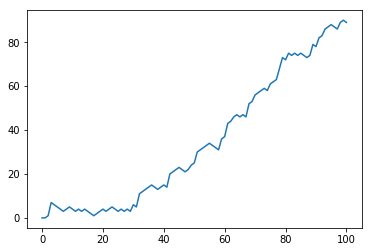

In [35]:
#Visuaizeing our steps

import matplotlib.pyplot as plt

plt.plot(random_walk)  #only passed one argument to plot, so will map it against the lists index while plotting automatically
plt.show() 

In [41]:
#Step 3 : How to find probability via studying DISTRIBUTION OF RANDOM WALKS 

## above we had the one play example of empire state case outcome. 
#TO get a DISTRIBUTION OF FINAL STEP we end at we need to simulate this 1000s of times and see the final step we reach

np.random.seed(110)

final_step = [] #an empty final_step list, which will store the final outcome of eah random walk

for y in range (10):#total 1000 trails; so 1000 random walk outcomes
    random_walk = [0] # Initialize random_walk -- we are at bottom of empire state building for each trial
    for x in range(100) : #100 random steps for each random walk trial
        step = random_walk[-1] #step is the value of last element stored in random_walk list after pervious iteration
        dice = np.random.randint(1,7)    # Roll the dice
        if dice <= 2:  # Determine next step
            step = max(0, step - 1) #Making sure we dont go below 0
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step) # append next_step to random_walk ; that is convert random individual steps to a random wak
     
    final_step.append(random_walk[-1])#appending the final step we are at each random walk trial outcome 

    
print(final_step)



[89, 66, 99, 73, 28, 98, 79, 83, 65, 70]


<function matplotlib.pyplot.show>

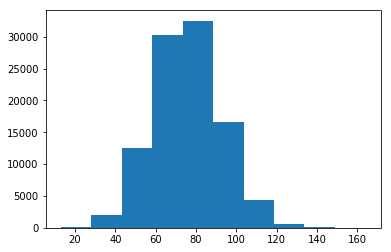

In [44]:
#Step 4 : Looking at the distribution (now with 10000 runs to maximizae accuracy) using  histograms

np.random.seed(110)

final_step = [] #an empty final_step list, which will store the final outcome of eah random walk

for y in range (99000):#total 99000 trails; so 99000 random walk outcomes
    random_walk = [0] # Initialize random_walk -- we are at bottom of empire state building for each trial
    for x in range(100) : #100 random steps for each random walk trial
        step = random_walk[-1] #step is the value of last element stored in random_walk list after pervious iteration
        dice = np.random.randint(1,7)    # Roll the dice
        if dice <= 2:  # Determine next step
            step = max(0, step - 1) #Making sure we dont go below 0
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step) # append next_step to random_walk ; that is convert random individual steps to a random wak
     
    final_step.append(random_walk[-1])#appending the final step we are at each random walk trial outcome 

import matplotlib.pyplot as plt   
plt.hist(final_step, bins = 10) #plotting a histogram of final steps distribution over 10 bins
plt.show

#thus the max probability is to reach atleast 60 floors. 